<a href="https://colab.research.google.com/github/Chamath-2004/Book-Store-Web-Application/blob/main/Telco_Customer_Churn_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#01. Import libraries


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#02. Load Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

# Place the CSV in your Drive and update path below
csv_path = '/content/drive/MyDrive/Colab Notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(csv_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Checking the Data

In [6]:
# === Cell: Quick checks ===
print("Shape:", df.shape)
display(df.head(5))
print("\nData types:\n", df.dtypes)
print("\nBasic description (numeric):")
display(df.describe().T)

Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Data types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Basic description (numeric):


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


# 04.Missing and duplicate values

In [9]:
# === Cell: Missing values & duplicates ===
missing = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing[missing>0])

dups = df.duplicated().sum()
print("\nNumber of duplicated rows:", dups)

# If any empty strings representing missing:
empty_counts = (df == "").sum().sort_values(ascending=False)
print("\nEmpty-string counts (possible missing):\n", empty_counts[empty_counts>0])

Missing values per column:
 Series([], dtype: int64)

Number of duplicated rows: 0

Empty-string counts (possible missing):
 Series([], dtype: int64)


# 05. Target distribution (churn)

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Proportions:


,proportion
Churn,
No,0.73463
Yes,0.26537


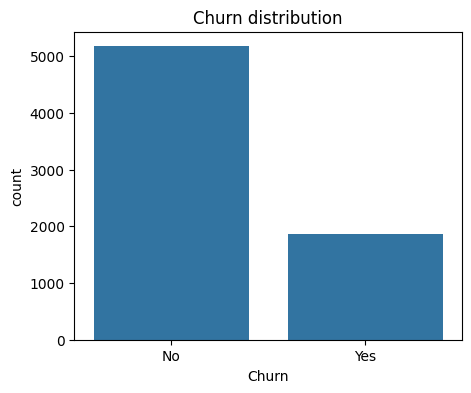

In [10]:
# === Cell: Target distribution ===
print(df['Churn'].value_counts())
print("\nProportions:")
display(df['Churn'].value_counts(normalize=True))

# Quick barplot
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Churn')
plt.title('Churn distribution')
plt.show()


# Basic numeric summaries & initial plots

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


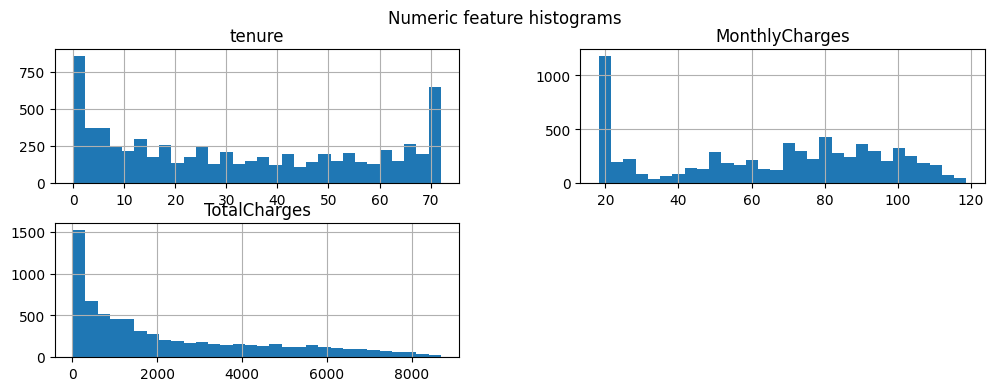

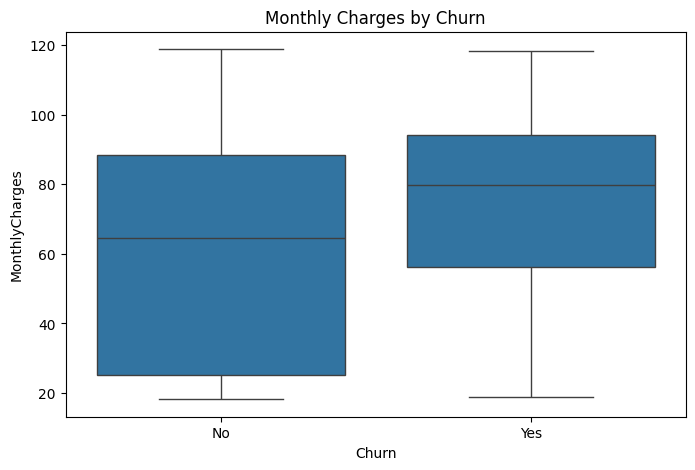

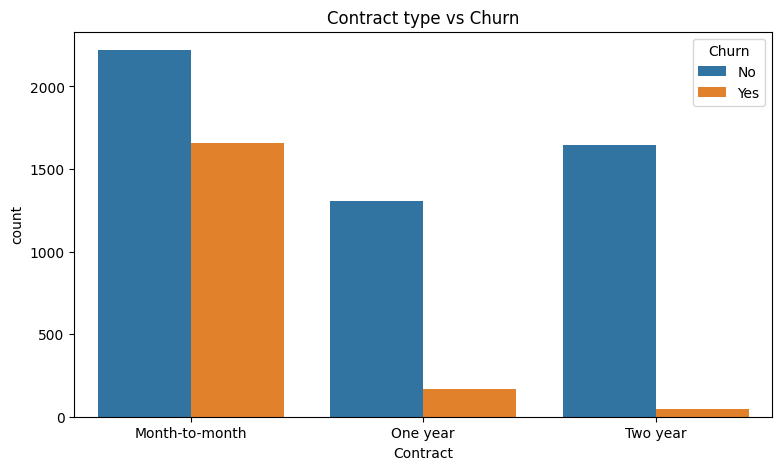

In [11]:
# === Cell: Numeric conversions and plots ===
# Convert TotalCharges to numeric if needed (coerce errors)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Show summary for numeric cols
display(df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe().T)

# Histograms
df[['tenure', 'MonthlyCharges', 'TotalCharges']].hist(bins=30, figsize=(12,4))
plt.suptitle('Numeric feature histograms')
plt.show()

# Boxplot: MonthlyCharges by Churn
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges by Churn')
plt.show()

# Countplot: Contract type vs Churn (stacked look)
plt.figure(figsize=(9,5))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Contract type vs Churn')
plt.show()


# Correlation matrix (numeric features)

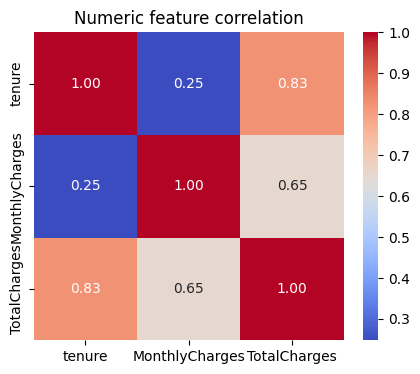

In [12]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
corr = df[num_cols].corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Numeric feature correlation')
plt.show()